In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from io import open
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(17)

In [3]:
from markets.stocks_model import create_stocks
from markets.stocks_model import create_chart_data

In [4]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12,4)})

#### Repeatable random: Always set a seed!

In [5]:
np.random.seed(17)

In [6]:
stocks = create_stocks(10)
stocks

{'PYFC': <markets.dynamic_market.Stock at 0x12ae04210>,
 'UVVA': <markets.dynamic_market.Stock at 0x12adfbfd0>,
 'HOKU': <markets.dynamic_market.Stock at 0x12ae04350>,
 'WWBQ': <markets.dynamic_market.Stock at 0x12ae04290>,
 'WXHG': <markets.dynamic_market.Stock at 0x12ae041d0>,
 'ISCR': <markets.dynamic_market.Stock at 0x12ae04110>,
 'OPMH': <markets.dynamic_market.Stock at 0x12ae04050>,
 'UBYR': <markets.dynamic_market.Stock at 0x12ae04490>,
 'KLNM': <markets.dynamic_market.Stock at 0x12ae043d0>,
 'KDDB': <markets.dynamic_market.Stock at 0x12ae044d0>}

In [7]:
config = {
    'num_investors': 10,
    'num_days': 128 + 1024, # 4 years with half a year of history
    'num_rounds_per_day': 5
}

In [8]:
%time chart_data = create_chart_data(stocks, config)
chart_data

CPU times: user 1min 16s, sys: 1.34 s, total: 1min 17s
Wall time: 1min 17s


{'PYFC': {'price': array([65.304, 65.904, 65.704, ..., 71.904, 72.104, 73.504]),
  'epv': array([65.66, 65.65, 65.65, ..., 74.5 , 74.57, 74.65])},
 'UVVA': {'price': array([ 63.867,  65.067,  65.467, ..., 157.267, 157.467, 158.867]),
  'epv': array([ 63.95,  63.99,  64.04, ..., 164.64, 164.88, 165.11])},
 'HOKU': {'price': array([ 68.926,  68.926,  69.526, ..., 203.726, 204.126, 203.726]),
  'epv': array([ 69.77,  69.84,  69.92, ..., 206.57, 206.77, 206.97])},
 'WWBQ': {'price': array([66.94, 66.94, 67.14, ..., 91.54, 92.14, 91.74]),
  'epv': array([66.49, 66.5 , 66.51, ..., 94.73, 94.85, 94.98])},
 'WXHG': {'price': array([ 68.954,  69.354,  68.954, ..., 118.754, 118.154, 118.554]),
  'epv': array([ 68.59,  68.61,  68.64, ..., 118.58, 118.71, 118.85])},
 'ISCR': {'price': array([51.889, 52.289, 52.889, ..., 82.489, 82.489, 82.489]),
  'epv': array([52.1 , 52.12, 52.13, ..., 84.85, 84.94, 85.02])},
 'OPMH': {'price': array([59.084, 57.484, 57.684, ..., 54.284, 53.484, 53.884]),
  'epv'

In [ ]:
num_files = 2
num_records = 10
t = time.time()
for file_no in range(1, num_files+1):
    with open('synthetic_eod/training-%i.md.pkl' % file_no, 'wb') as file:
        for rec_no in range(num_records):
            stocks = create_stocks(10)            
            chart_data = create_chart_data(stocks, config)
            dt = int(time.time() - t)
            t = time.time()
            print("after %s seconds - dumping record no %s into file %s" % (dt, rec_no, file_no))
            pickle.dump(chart_data, file)

after 85 seconds - dumping record no 0 into file 1
after 74 seconds - dumping record no 1 into file 1


#### Verifying the output

In [15]:
from drl.trading_model import MarketEnvironment, EnvironmentFactory

In [18]:
portfolio= [1e6] + 10 * [1e5]

factory = EnvironmentFactory(pattern="synthetic_eod/*.md.pkl", 
                             duration=1024, 
                             n_hist=128, 
                             portfolio=portfolio, 
                             return_scale=100, 
                             weight_scale=10, 
                             fee = 2.5e-3)

In our market environment, 10 different securities are being traded.

In [20]:
tickers = factory.tickers()
tickers

['TYPL',
 'WLUV',
 'PHTT',
 'LTRD',
 'VDYQ',
 'QYEV',
 'XFXC',
 'OENB',
 'UGBP',
 'ONAK']

In [27]:
len(factory.data)

20

In [32]:
[1, 2, 2] + [3,4 ,6]

[1, 2, 2, 3, 4, 6]

In [39]:
all_tickers = []
for ds in factory.data:
    all_tickers.append(list(ds.keys()))

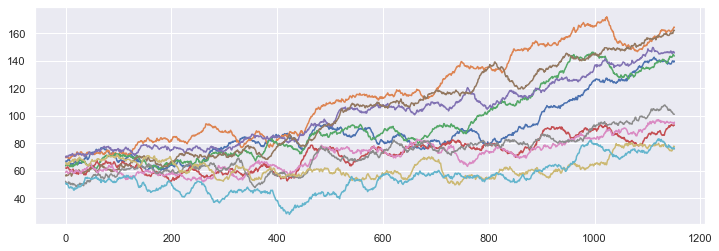

In [49]:
setno = 9
for i in range(10):
    plt.plot(factory.prices_for(all_tickers[setno][i], index=setno));